In [ ]:
# Bitly is a URL shortening service.
# Bitly partnered with USA.gov to provide a feed of anonymous data 
# gathered from users wh osorten links ending with .gov or .mil

In [1]:
import json
path = r'C:\Users\hh4678\Desktop\DS ML\bitly_usagov\example.txt'
records = [json.loads(line) for line in open(path)]

print('Number of records: {}'.format(len(records)))

Number of records: 3560


In [2]:
# Let's see what one of these records looks like.

records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [3]:
# How many unique timezones are there?

# Using list comprehension:
# time_zones = [rec['tz'] for rec in records if 'tz' in rec]

time_zones = []
for rec in records:
    if 'tz' in rec:
        time_zones.append(rec['tz'])
        
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [4]:
# Determin which timzone has the most entries
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

counts = get_counts(time_zones)
print(len(counts))

97


In [5]:
# How many were from New York?
p = '{:.2%}'.format((counts['America/New_York'] / len(time_zones)))

print('Number of entries from New York: {} or {}'.format(counts['America/New_York'], p))

Number of entries from New York: 1251 or 36.37%


In [6]:
# Find the top 10 most frequent time zones
reorder_counts = [(val, key) for key, val in counts.items()]

reorder_counts.sort(reverse=True)
reorder_counts[:10]

[(1251, 'America/New_York'),
 (521, ''),
 (400, 'America/Chicago'),
 (382, 'America/Los_Angeles'),
 (191, 'America/Denver'),
 (74, 'Europe/London'),
 (37, 'Asia/Tokyo'),
 (36, 'Pacific/Honolulu'),
 (35, 'Europe/Madrid'),
 (33, 'America/Sao_Paulo')]

In [7]:
# Transform JSON data using pandas

import pandas as pd

frame = pd.DataFrame(records)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


In [8]:
# Check timzone field
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [9]:
# Determine most frequent time zones
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [10]:
# Rename blank index to Unknown
tz_counts.rename(index={'' : 'Unknown'}, inplace=True)
tz_counts[:5]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: tz, dtype: int64

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
sns.barplot(y=tz_counts[:10].index, x=tz_counts[:10].values)

In [12]:
# Remove unnecessary columns
frame = frame[['a', 'c', 'cy', 'tz']]

# Index frame to not include nulls found in 'a'
frame = frame[pd.notnull(frame['a'])].reset_index()

# Check to make sure 'a' contains no nulls
frame.isna().sum()

index      0
a          0
c        521
cy       521
tz         0
dtype: int64

In [ ]:
# The 'a' field contains information about the browser, device, or application used to perform
# URL shortening.

# Supposed we want to determine whether someone is running Windows, Macintosh, or Linux

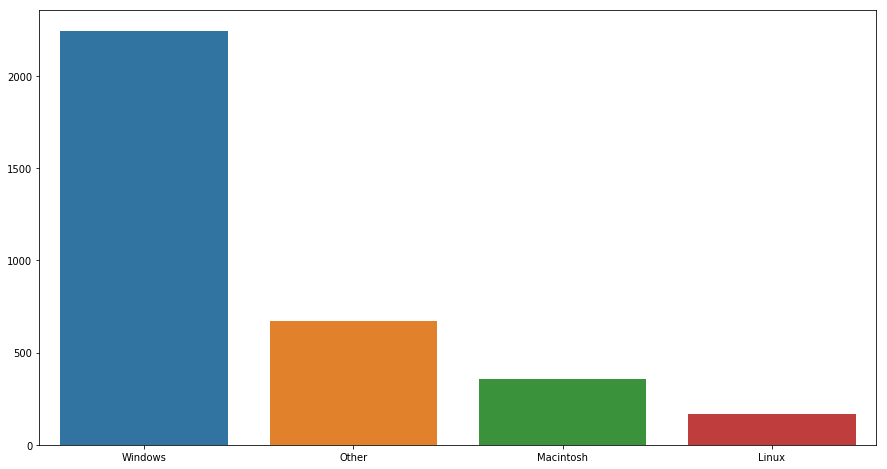

In [13]:
# The largest operating systems are Windows, Macintosh, and Linux.
# Let's see what ones are present and their distribution.

# operating_system = []
# for key, value in frame['a'][:5].iteritems():
#     if 'Windows' in value:
#         operating_system.append('Windows')
#     elif 'Macintosh' in value:
#         operating_system.append('Macintosh')
#     elif 'Linux' in value:
#         operating_system.append('Linux')
#     else:
#         operating_system.append('Other')

operating_system = ['Windows' if 'Windows' in value else 'Macintosh' if 'Macintosh' in value 
                    else 'Linux' if 'Linux' in value else 'Other' for key, value in frame['a'].iteritems()]

frame['OperatingSystem'] = pd.Series(operating_system)

os = frame['OperatingSystem'].value_counts()

# Plot the value counts.
plt.figure(figsize=(15, 8))
sns.barplot(x=os.index, y=os.values, data=frame)


In [74]:
# Determine list of most popular Operating Systems per Time Zone

def get_os_counts(data, os_name, top_n=10):
    """Returns counts of timezones based on OS."""
    
    os_name = os_name[0].upper() + os_name[1:].lower()
    data = frame[['tz', 'OperatingSystem']].loc[frame['OperatingSystem'] == os_name].reset_index(drop=True)
    
    data['tz'].loc[data['tz'] == ''] = 'Unknown'
    data.drop('OperatingSystem', axis=1, inplace=True)
    
    counter = {}
    for key, value in data.iteritems():
        for i in value:
            if i in counter:
                counter[i] += 1
            else:
                counter[i] = 1
                
    sorted_counter = [(value, key) for key, value in counter.items()]
    sorted_counter.sort(reverse=True)
    
    return sorted_counter[:top_n]

In [229]:
def create_df():
    """Reorder list of tuples per OS"""
    
    os = ['Windows', 'Macintosh', 'Linux']
    
    os_name = []
    count = []
    tz = []
    for i in os:
        for j in get_os_counts(frame, i, 5):
            os_name.append(i)
            count.append(j[0])
            tz.append(j[1])

    
    df = pd.DataFrame({'Timezone' : tz, 'Count' : count, 'OperatingSystem' : os_name})
    
    return df

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

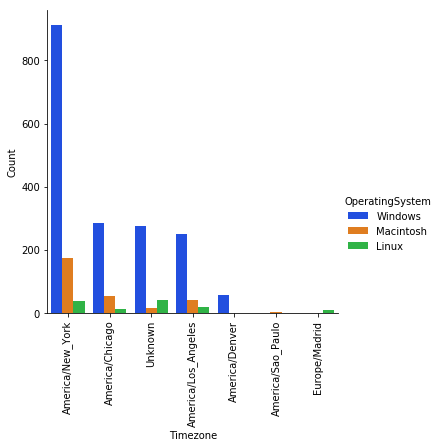

In [230]:
# Top 5 Time Zones per Operating System

df = create_df()

sns.catplot(x='Timezone', y='Count', hue='OperatingSystem', kind='bar', palette='bright', data=df)
plt.xticks(rotation=90)